## Example: Image Compression

In [1]:
# Import all the necessary modules
import numpy as np
from matplotlib.image import imread
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'Original Image')

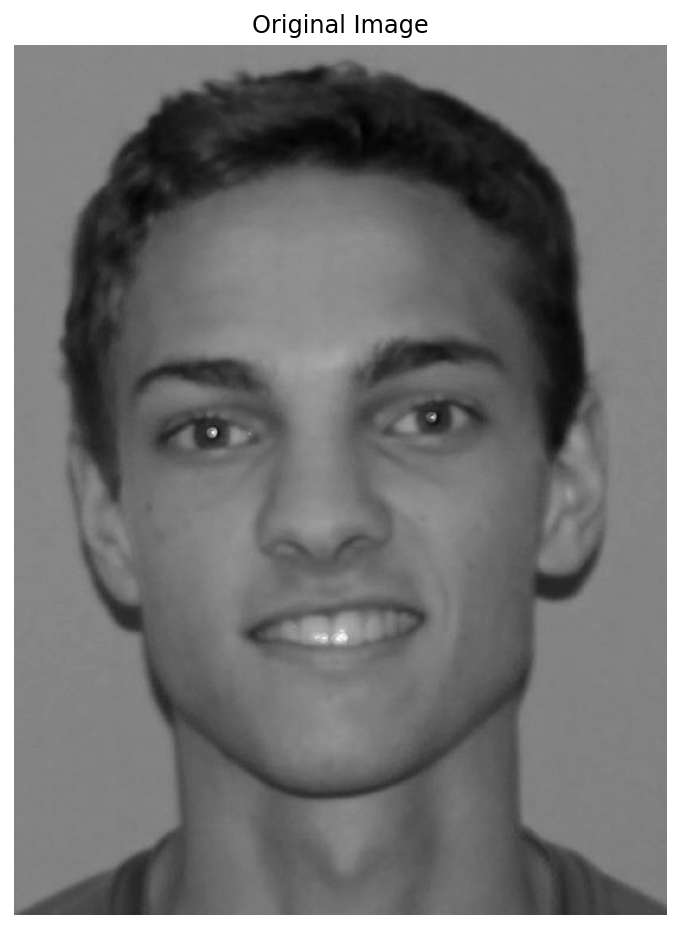

In [6]:
plt.rcParams['figure.figsize'] = [16, 8]

# Load an image
image = imread('Images\Matt_Hay.jpg')
X = np.mean(image, -1) # Convert RGB image to grayscale

# Show original image
image = plt.imshow(X)
image.set_cmap('gray')
plt.axis('off')
plt.title('Original Image')

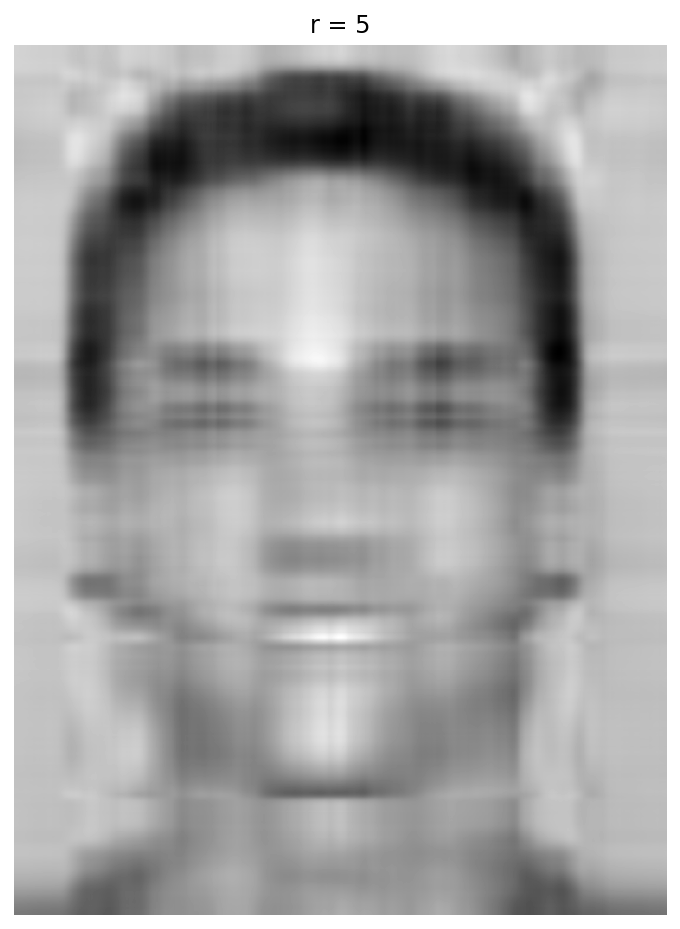

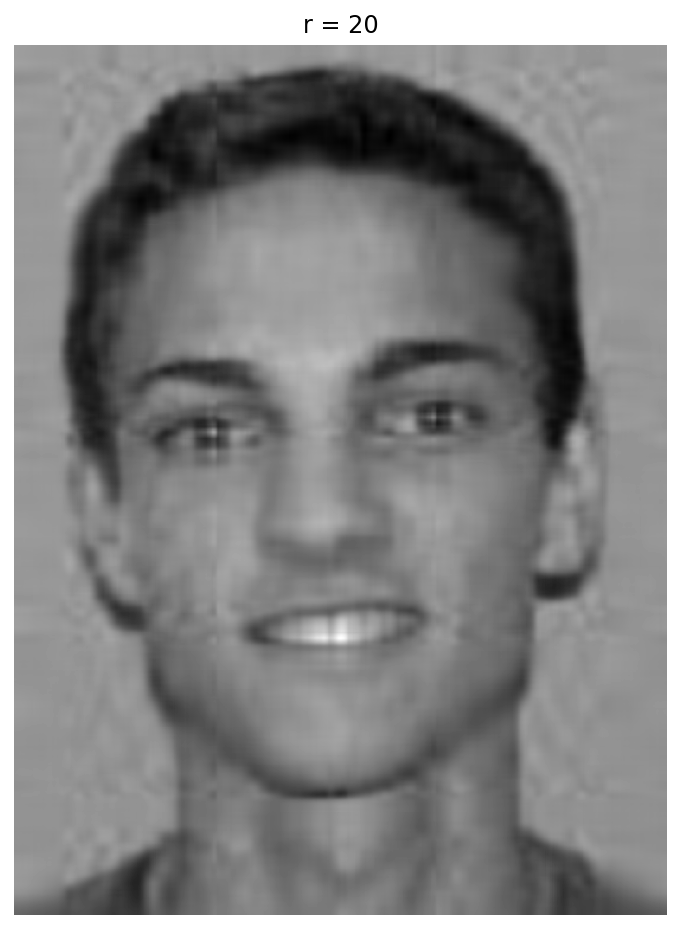

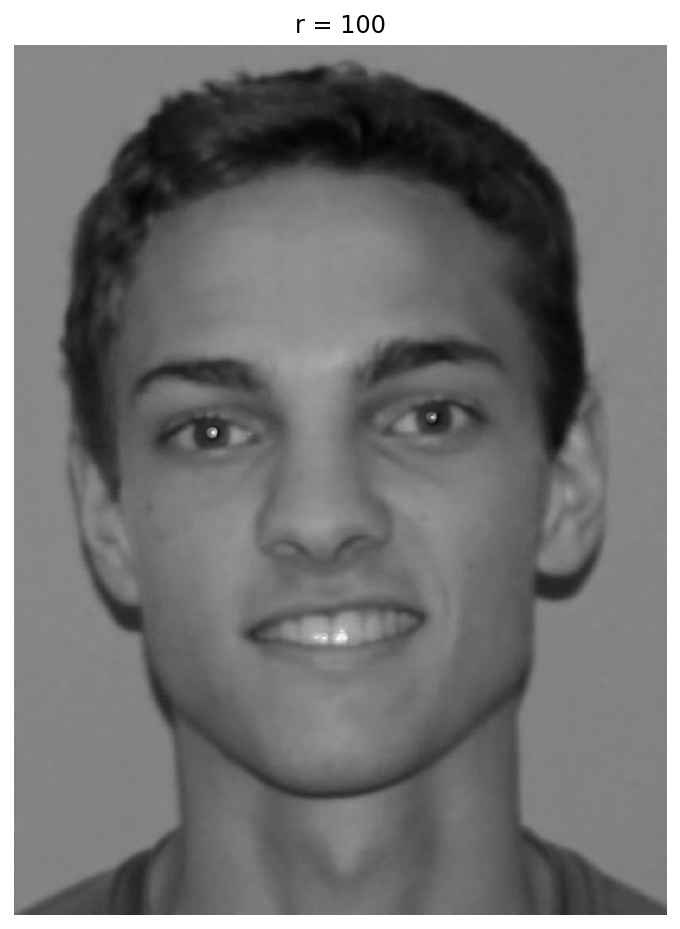

In [3]:
# Calculate the SVD of the image
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

# Construct and show approximate images
j = 0
for rank in (5, 20, 100):
    X_approx = U[:, :rank] @ S[0:rank, :rank] @ VT[:rank, :]
    plt.figure(j+1)
    j +=1
    image = plt.imshow(X_approx)
    image.set_cmap('gray')
    plt.axis('off')
    plt.title('r = '+str(rank))
    plt.show()

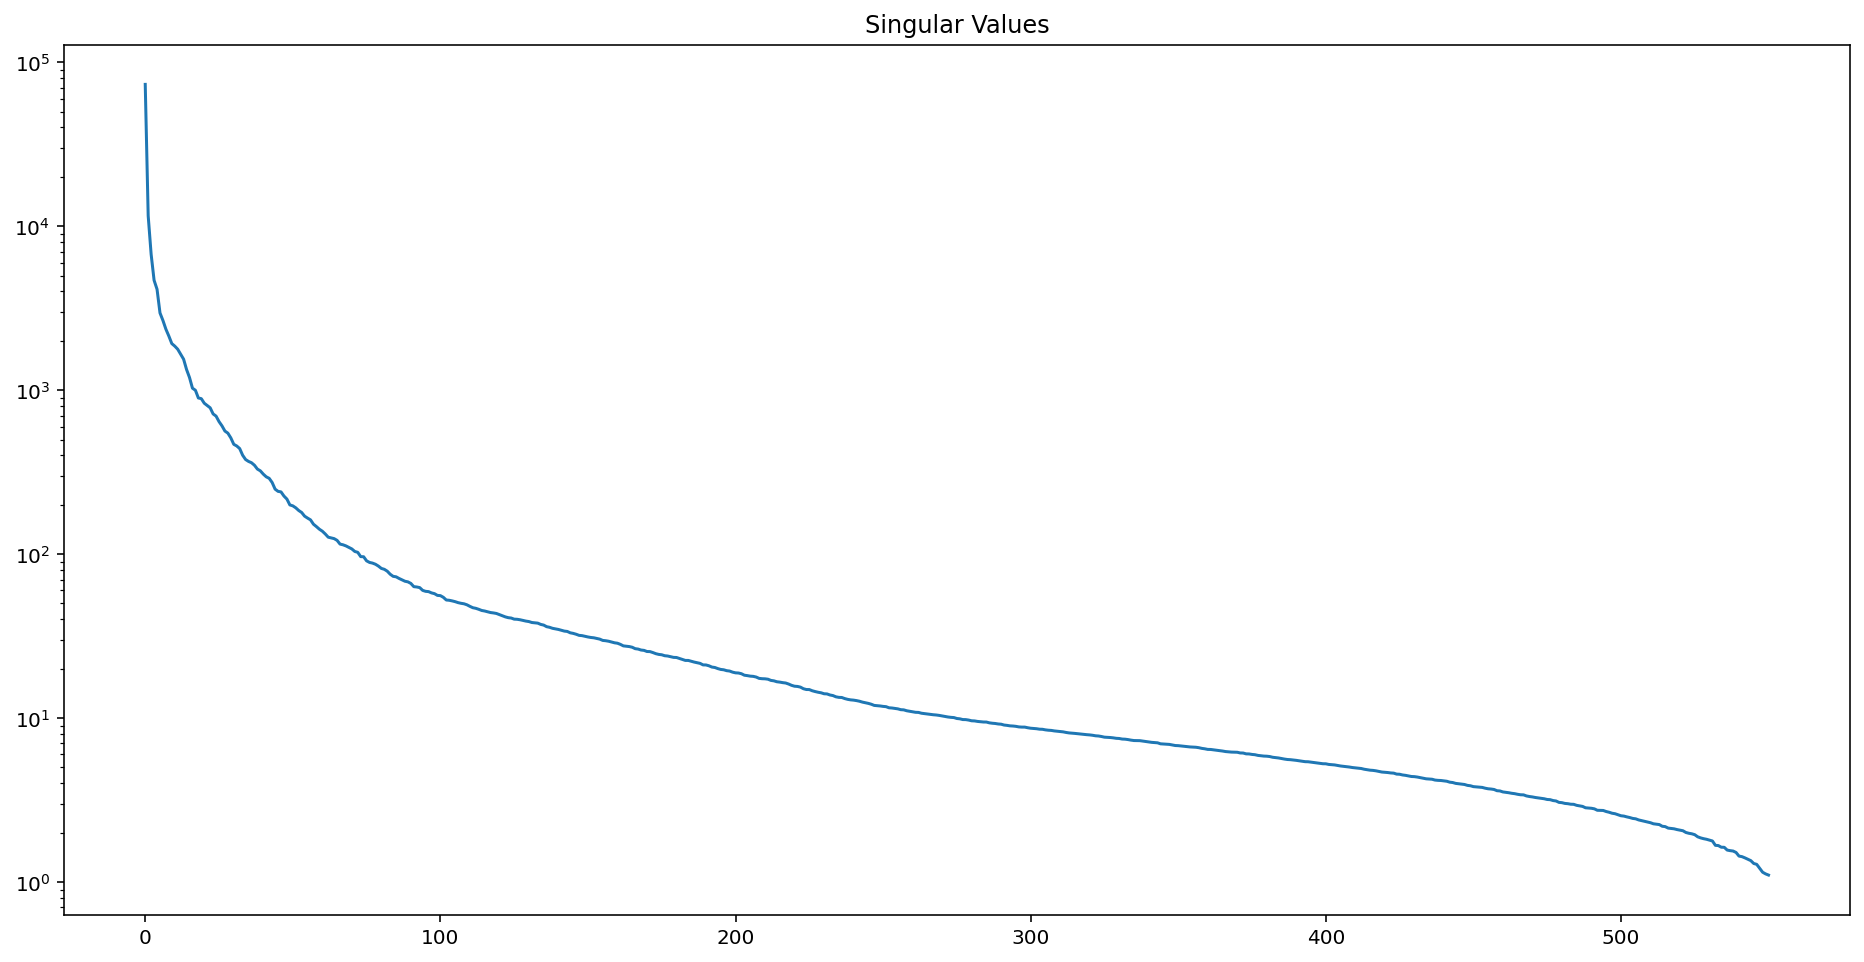

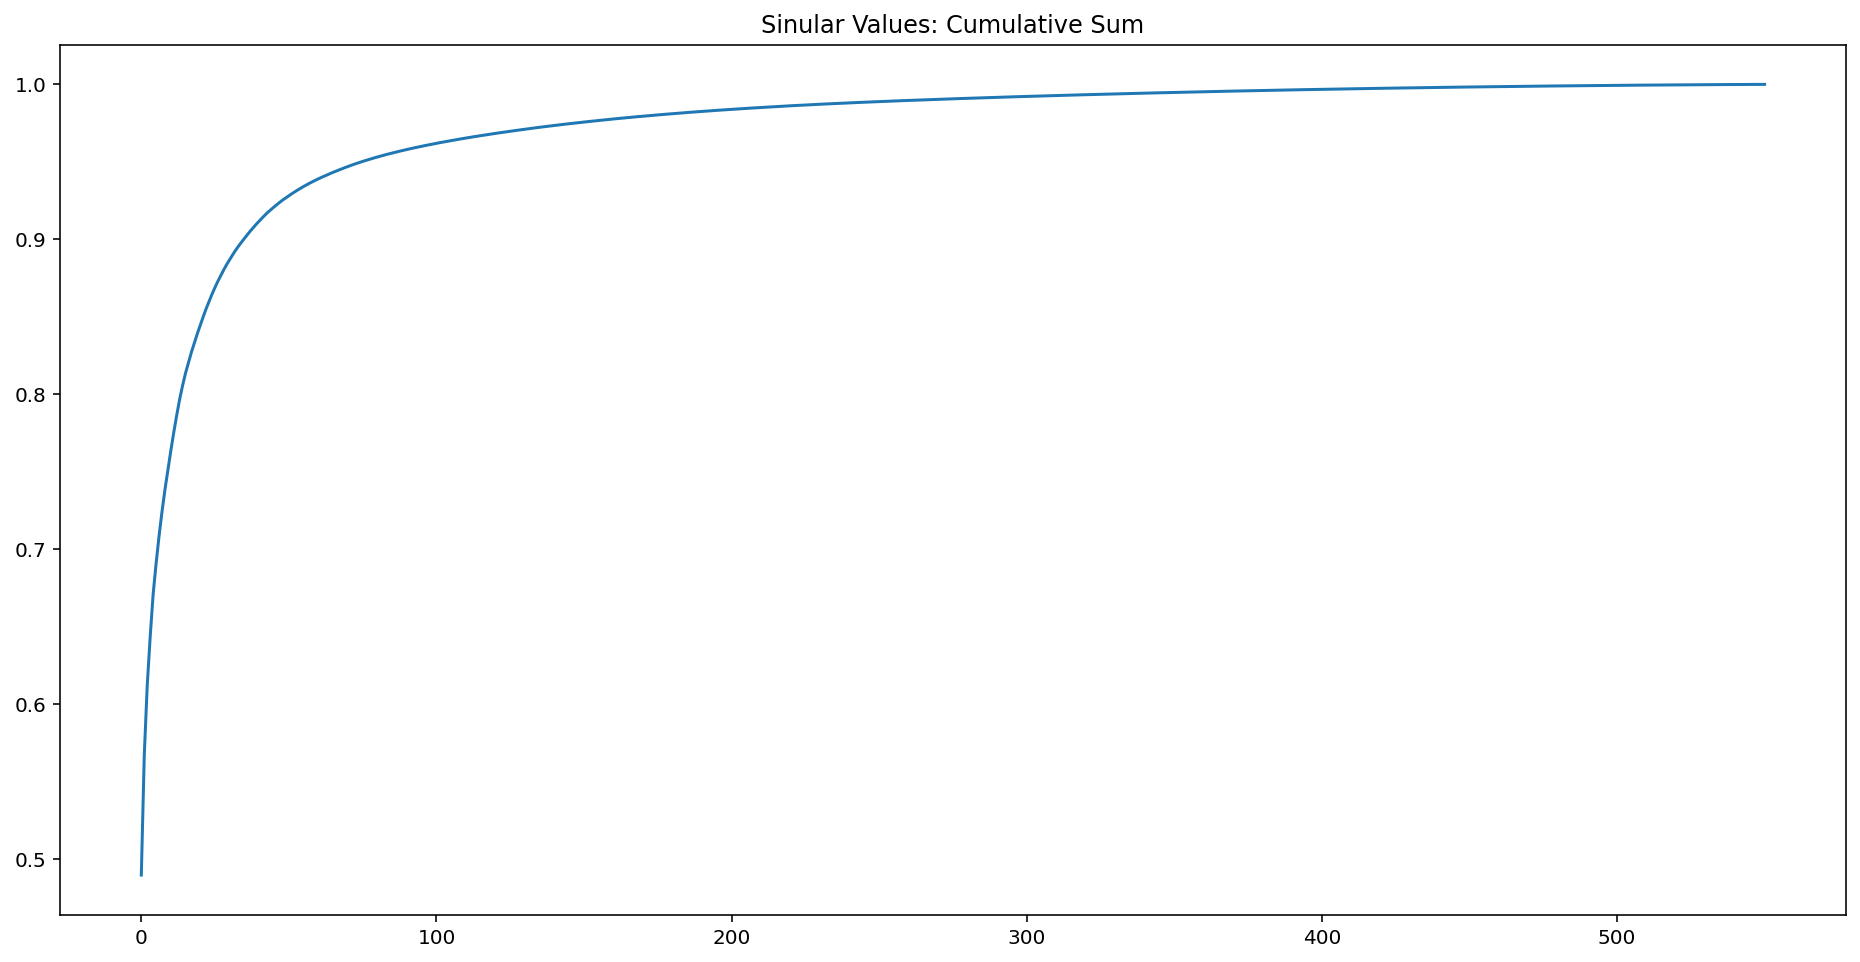

In [8]:
# Plot singular values and cumulative energy of the SVD
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Sinular Values: Cumulative Sum')
plt.show()

### Results:
Here we can see that most of the information in a matrix is represented by the first few rank SVD approximations. In our case, a rank 100 SVD captures above 95% of the information stored in the economy SVD, which was of rank 551 and captures 100% of the image data.